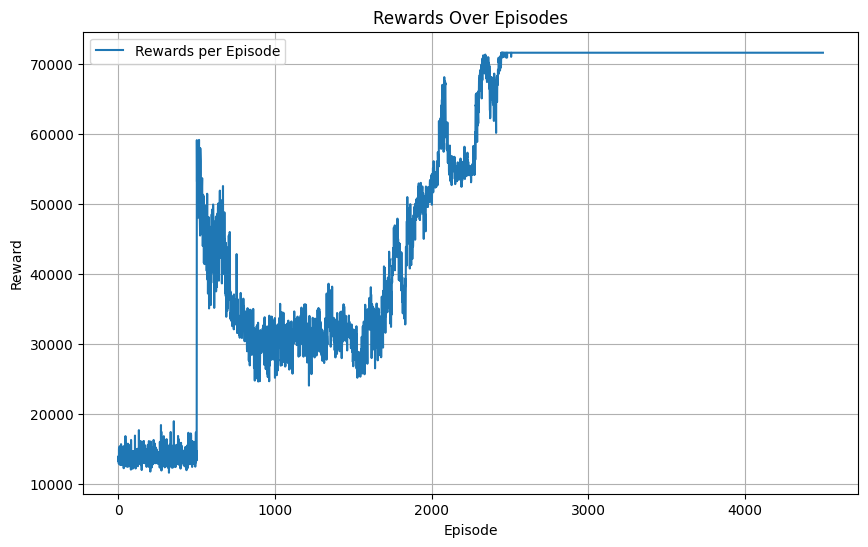

In [1]:
import matplotlib.pyplot as plt

# Reading the rewards from the file
file_path = 'rewards.txt'  # Replace with your actual file path
with open(file_path, 'r') as file:
    rewards = [float(line.strip()) for line in file]

# Plotting the rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Episodes')
plt.legend()
plt.grid(True)
plt.show()


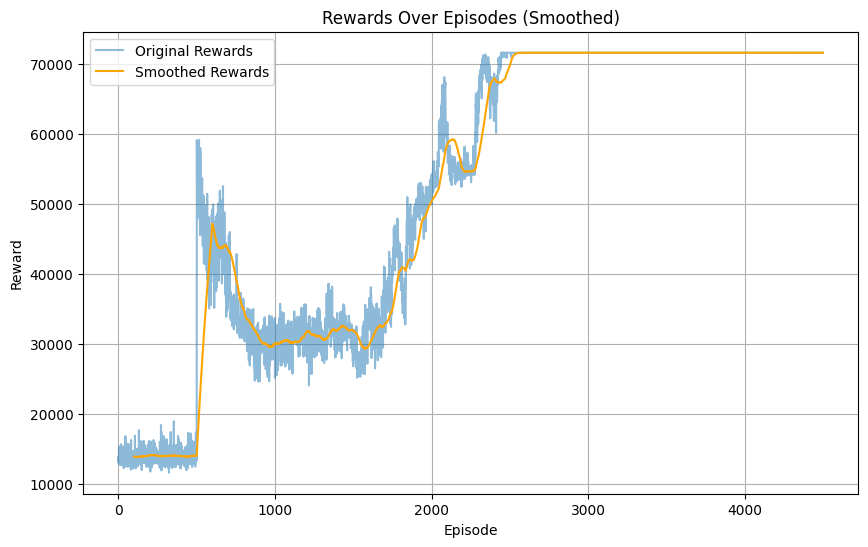

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    """ Calculate the moving average over a specific window size """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Reading the rewards from the file
file_path = 'rewards.txt'  # Replace with your actual file path
with open(file_path, 'r') as file:
    rewards = [float(line.strip()) for line in file]

# Smoothing the rewards
window_size = 100  # Adjust this for more or less smoothing
smoothed_rewards = moving_average(rewards, window_size)

# Plotting the rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Original Rewards', alpha=0.5)  # Original rewards (more transparent)
plt.plot(range(window_size-1, len(rewards)), smoothed_rewards, label='Smoothed Rewards', color='orange')  # Smoothed rewards
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Episodes (Smoothed)')
plt.legend()
plt.grid(True)
plt.show()


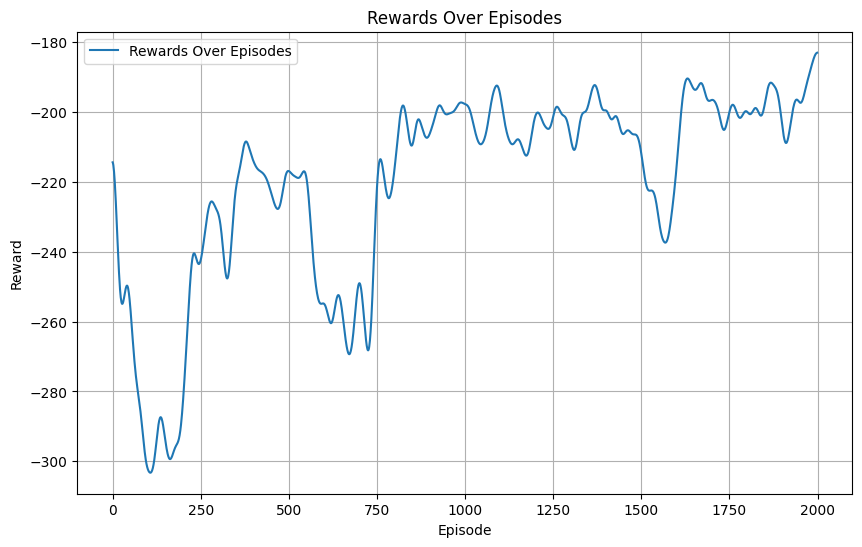

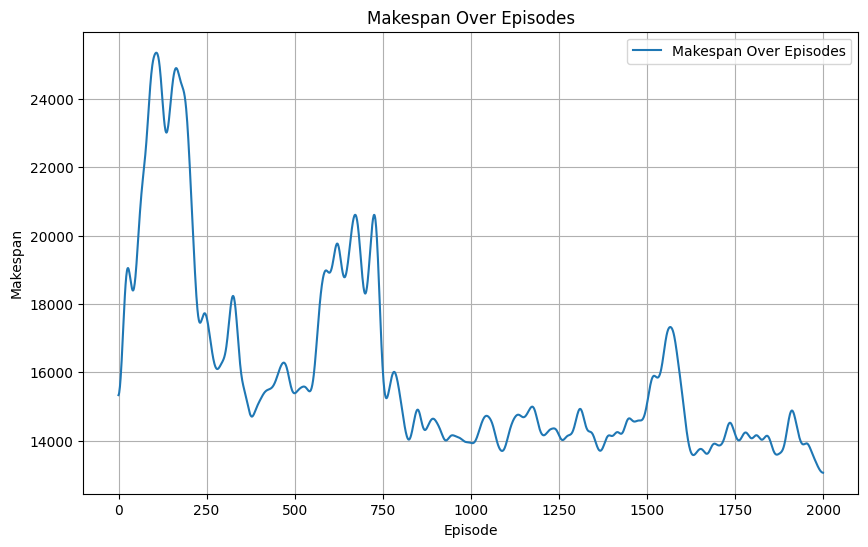

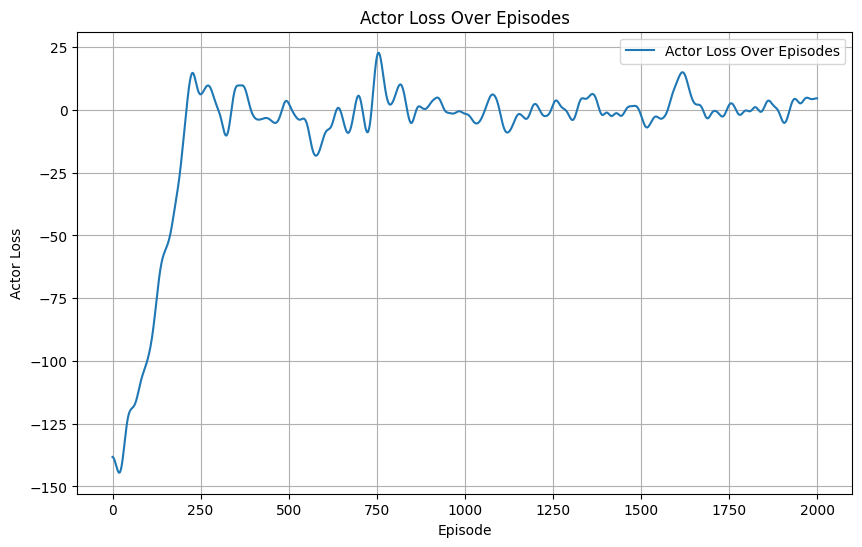

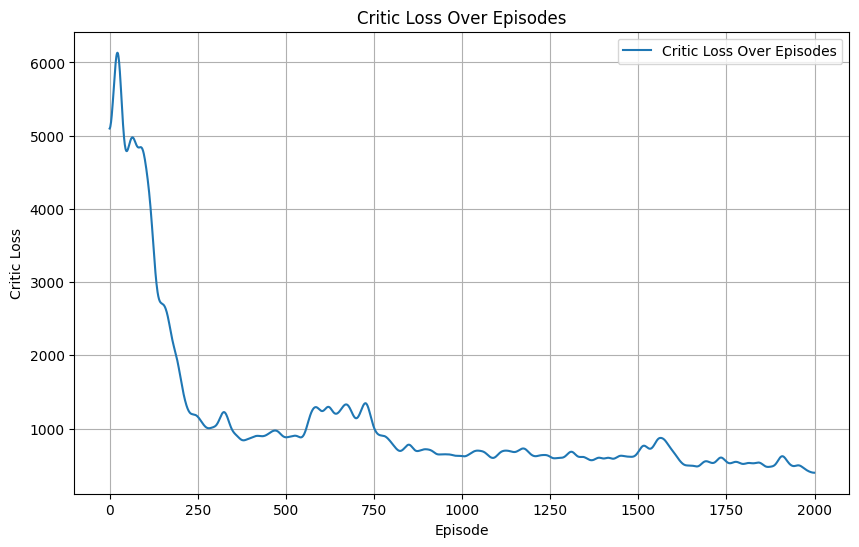

In [ ]:

### action reward
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Define a function to read data from files
def read_data(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

# File paths (replace with the correct paths)
rewards_file = '/home/aaa/my_code/hospital-main/A2C_output/rewards_12_10_06_17(action reward).txt'
makespan_file = '/home/aaa/my_code/hospital-main/A2C_output/makespan_12_10_06_17(action reward).txt'
actor_loss_file = '/home/aaa/my_code/hospital-main/A2C_output/actor_loss_12_10_06_17.txt'
critic_loss_file = '/home/aaa/my_code/hospital-main/A2C_output/critic_loss_12_10_06_17.txt'

# Read data
rewards = read_data(rewards_file)
makespan = read_data(makespan_file)
actor_loss = read_data(actor_loss_file)
critic_loss = read_data(critic_loss_file)

# Define a function to plot and smooth data
def plot_data(data, title, xlabel, ylabel, smooth=True, window_size=10):
    if smooth:
        data = gaussian_filter1d(data, sigma=window_size)
    plt.figure(figsize=(10, 6))
    plt.plot(data, label=title)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot rewards
plot_data(rewards, "Rewards Over Episodes", "Episode", "Reward")

# Plot makespan
plot_data(makespan, "Makespan Over Episodes", "Episode", "Makespan")

# Plot actor loss
plot_data(actor_loss, "Actor Loss Over Episodes", "Episode", "Actor Loss")

# Plot critic loss
plot_data(critic_loss, "Critic Loss Over Episodes", "Episode", "Critic Loss")


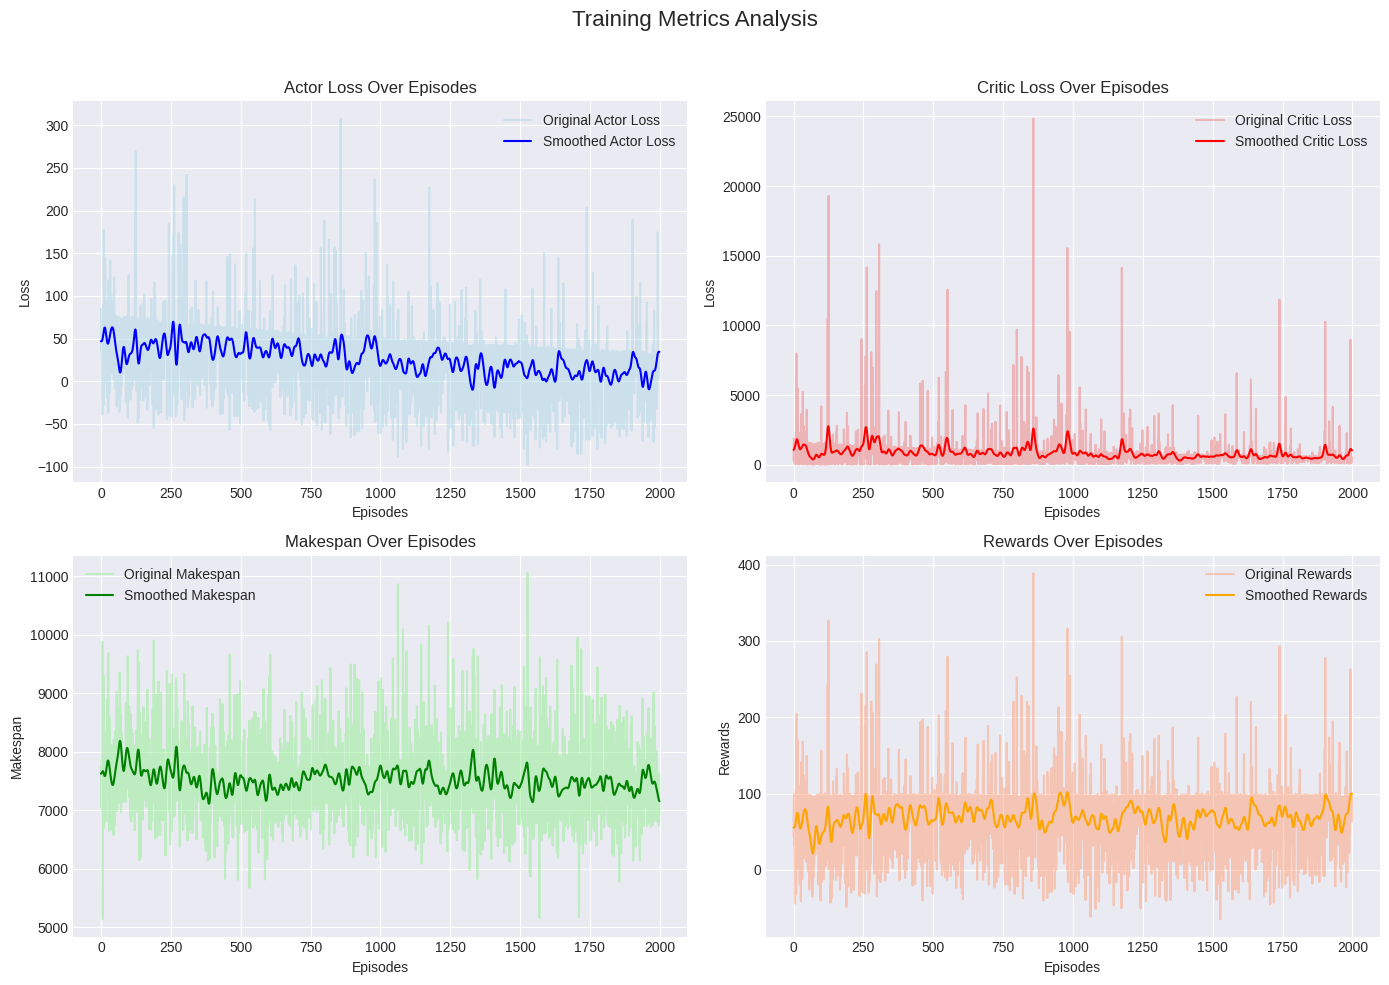

In [24]:

# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_02_15_13_43.txt"  # Replace with actual path
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_02_15_13_43.txt"  # Replace with actual path
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_02_15_13_43(82-gcn).txt"  # Replace with actual path
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_02_15_13_43(82-gcn).txt"  # Replace with actual path

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()



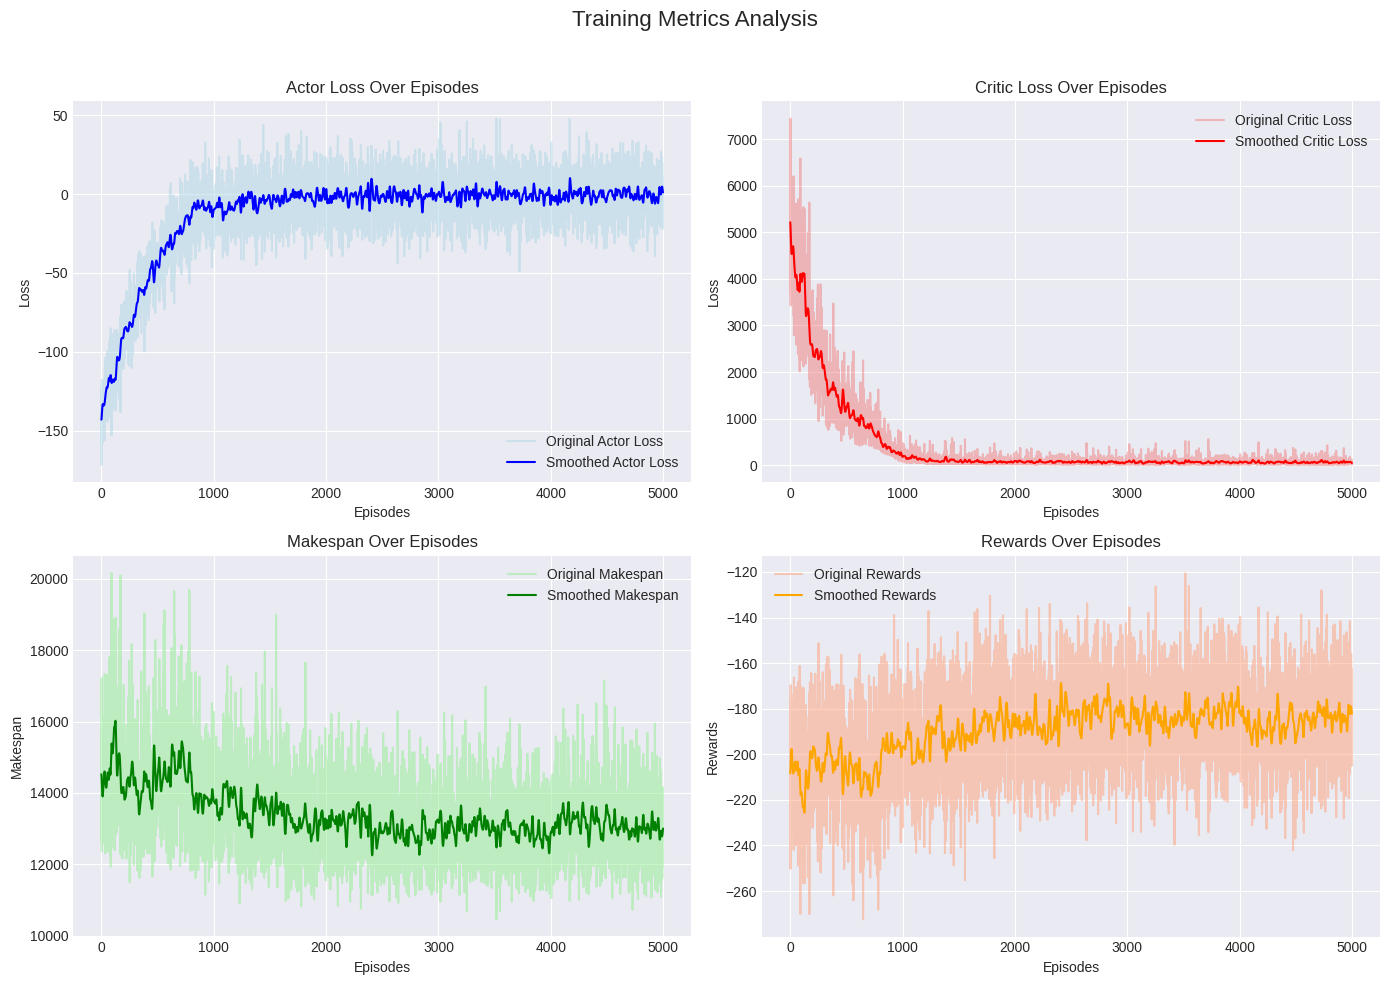

In [12]:

# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/MY DATA/actor_loss_12_28_01_17.txt"  # Replace with actual path
critic_loss_path = "/home/aaa/my_code/hospital-main/MY DATA/critic_loss_12_28_01_17.txt"  # Replace with actual path
makespan_path = "/home/aaa/my_code/hospital-main/MY DATA/makespan_12_28_01_17(26,256,3E-4).txt"  # Replace with actual path
rewards_path = "/home/aaa/my_code/hospital-main/MY DATA/rewards_12_28_01_17(26,256,3E-4).txt"  # Replace with actual path

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()



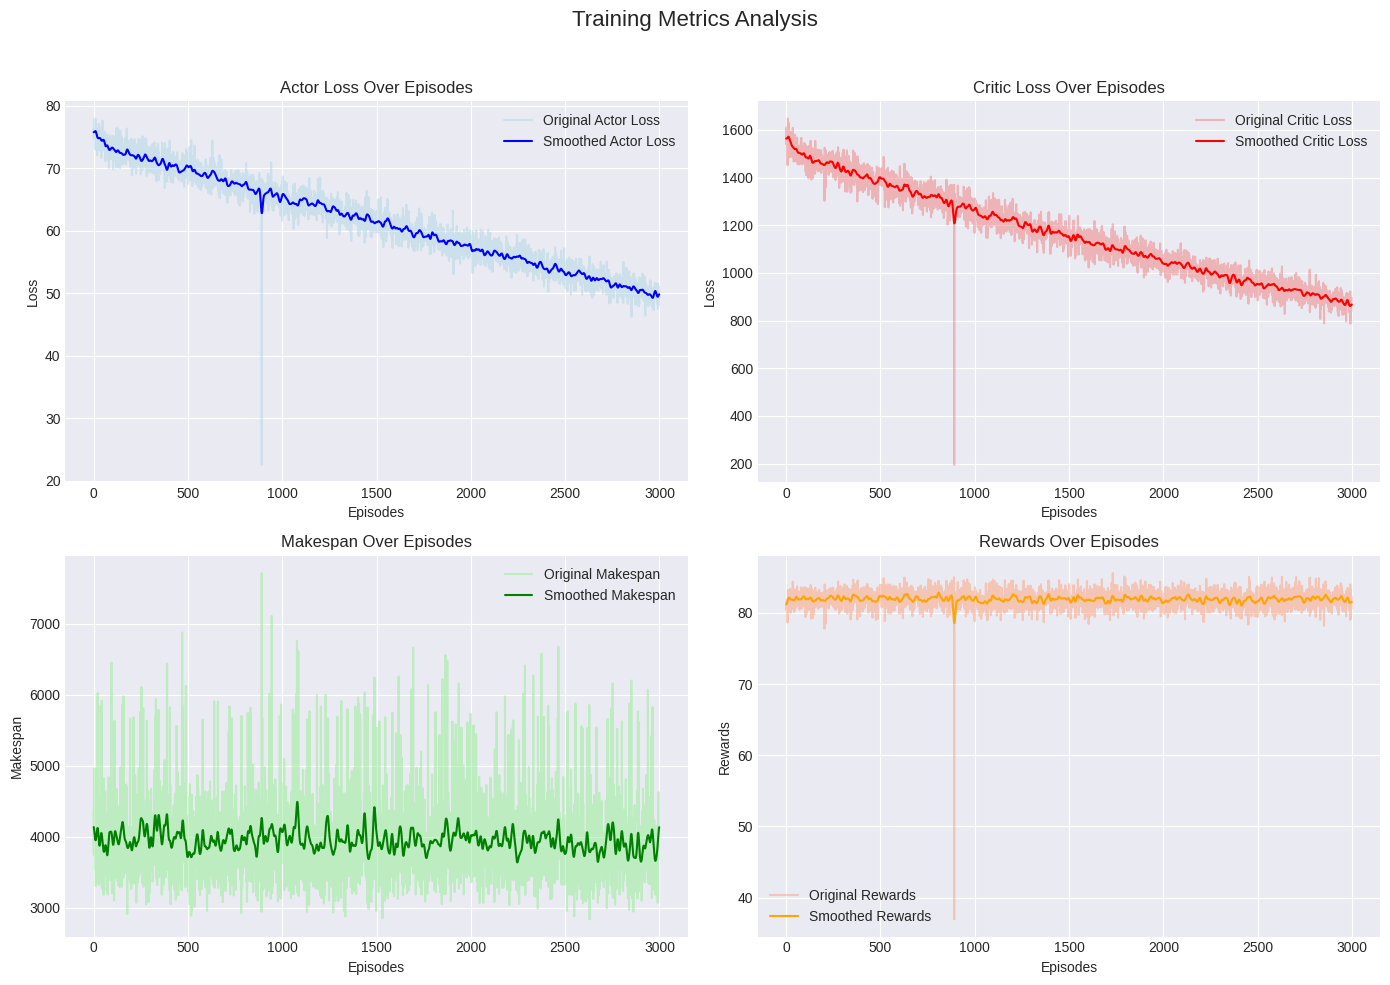

In [21]:

# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_03_18_00_17.txt"  # Replace with actual path
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_03_18_00_17.txt"  # Replace with actual path
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_03_18_00_17.txt"  # Replace with actual path
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_03_18_00_17(50-gcn-22-128-1e-4未).txt"  # Replace with actual path

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()



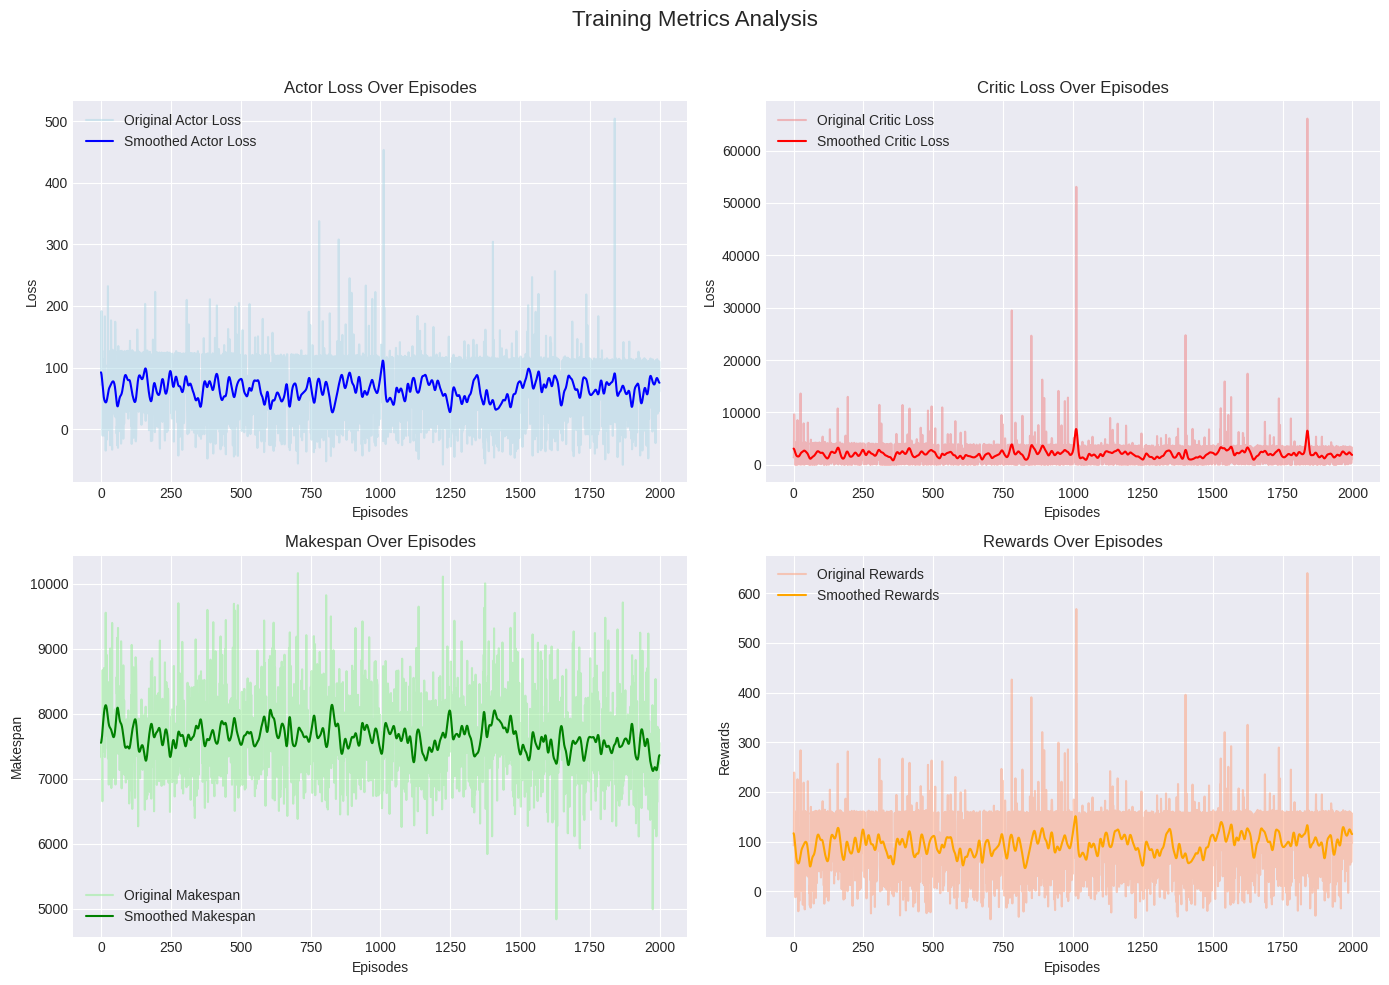

In [4]:

# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_04_01_17_27.txt"
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_04_01_17_27.txt"
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_04_01_17_27.txt"
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_04_01_17_27(100-gat-128-1e-4未训练)13280.txt"

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()



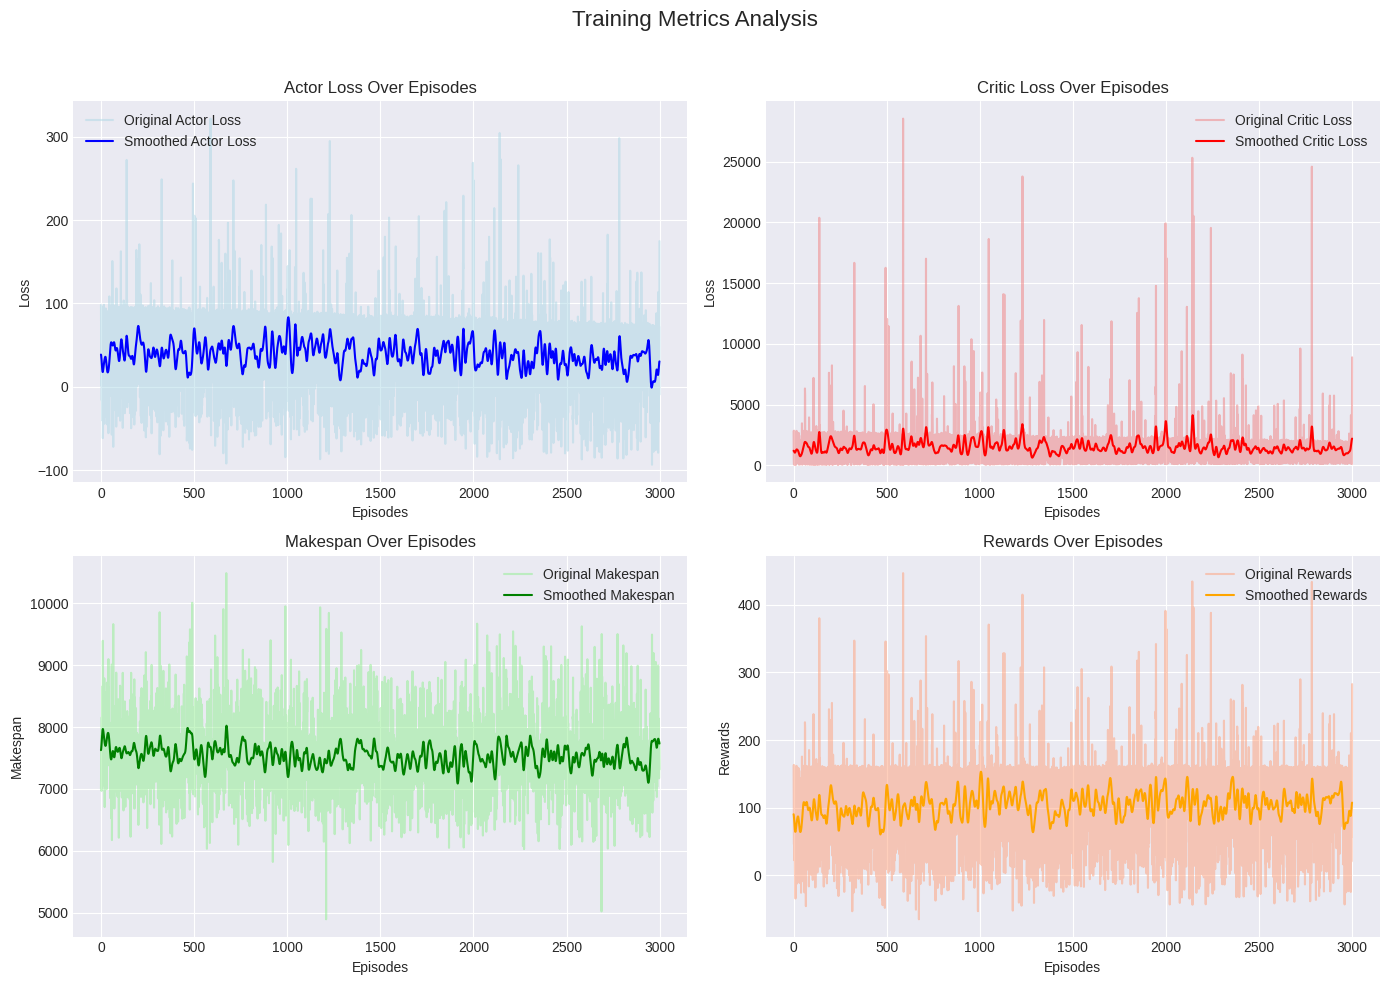

In [3]:


# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_04_01_00_34.txt"
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_04_01_00_34.txt"
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_04_01_00_34.txt"
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_04_01_00_34(100-gcn-128-2e-4-训)18448.txt"

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()

# Save the figure
fig.savefig("training_metrics_analysis.png", dpi=300)


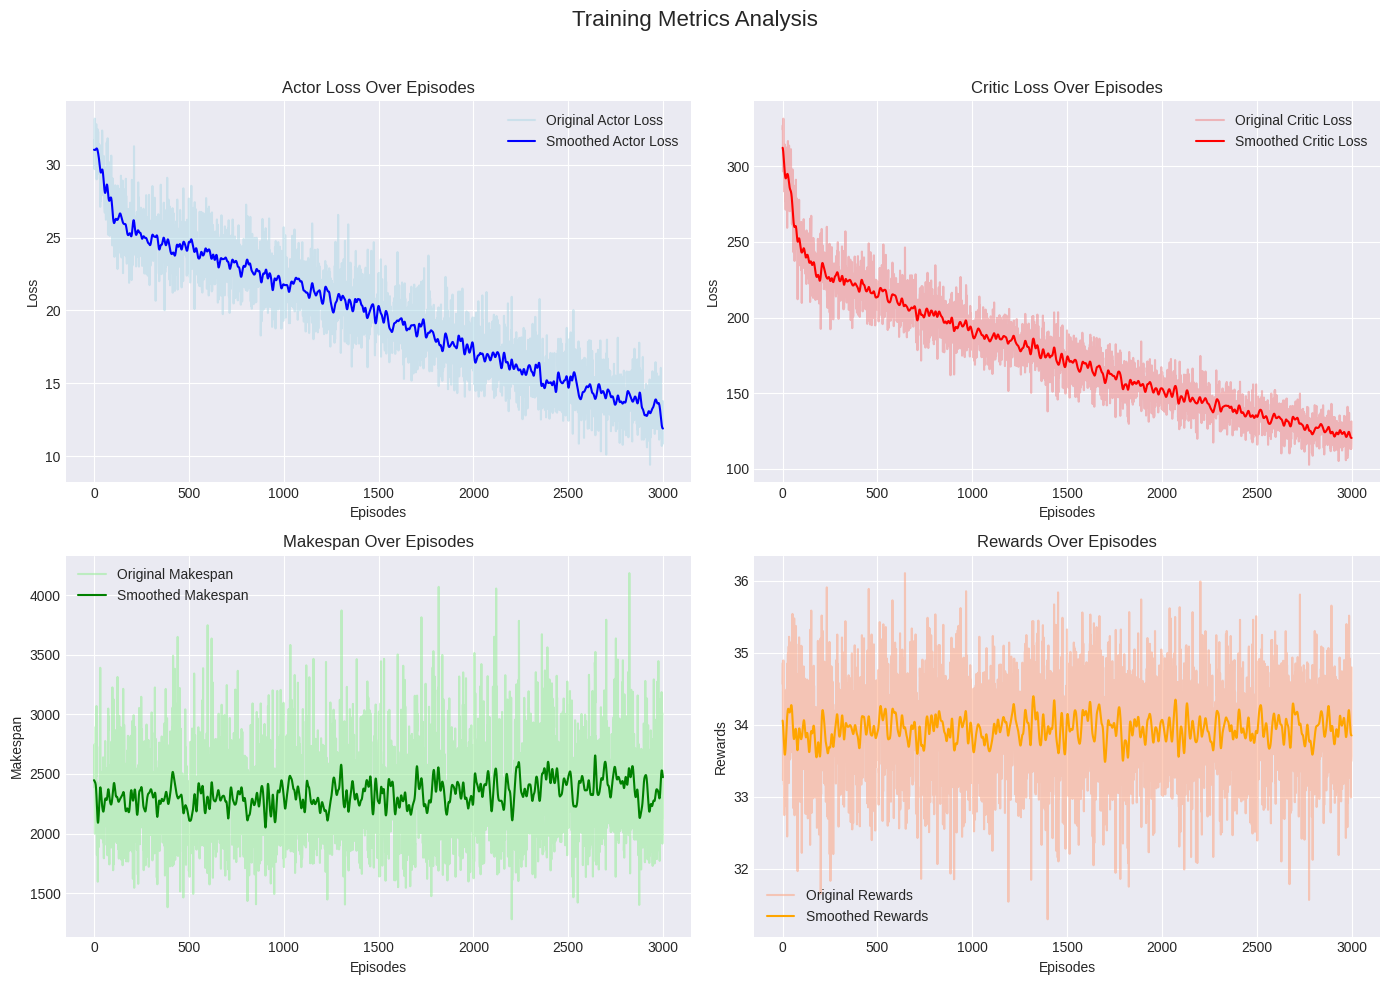

In [2]:
# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_04_01_08_07.txt"
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_04_01_08_07.txt"
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_04_01_08_07.txt"
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_04_01_08_07(20-gcn-64-1e-4训)2677.txt"

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()

# Save the figure
fig.savefig("training_metrics_analysis.png", dpi=300)


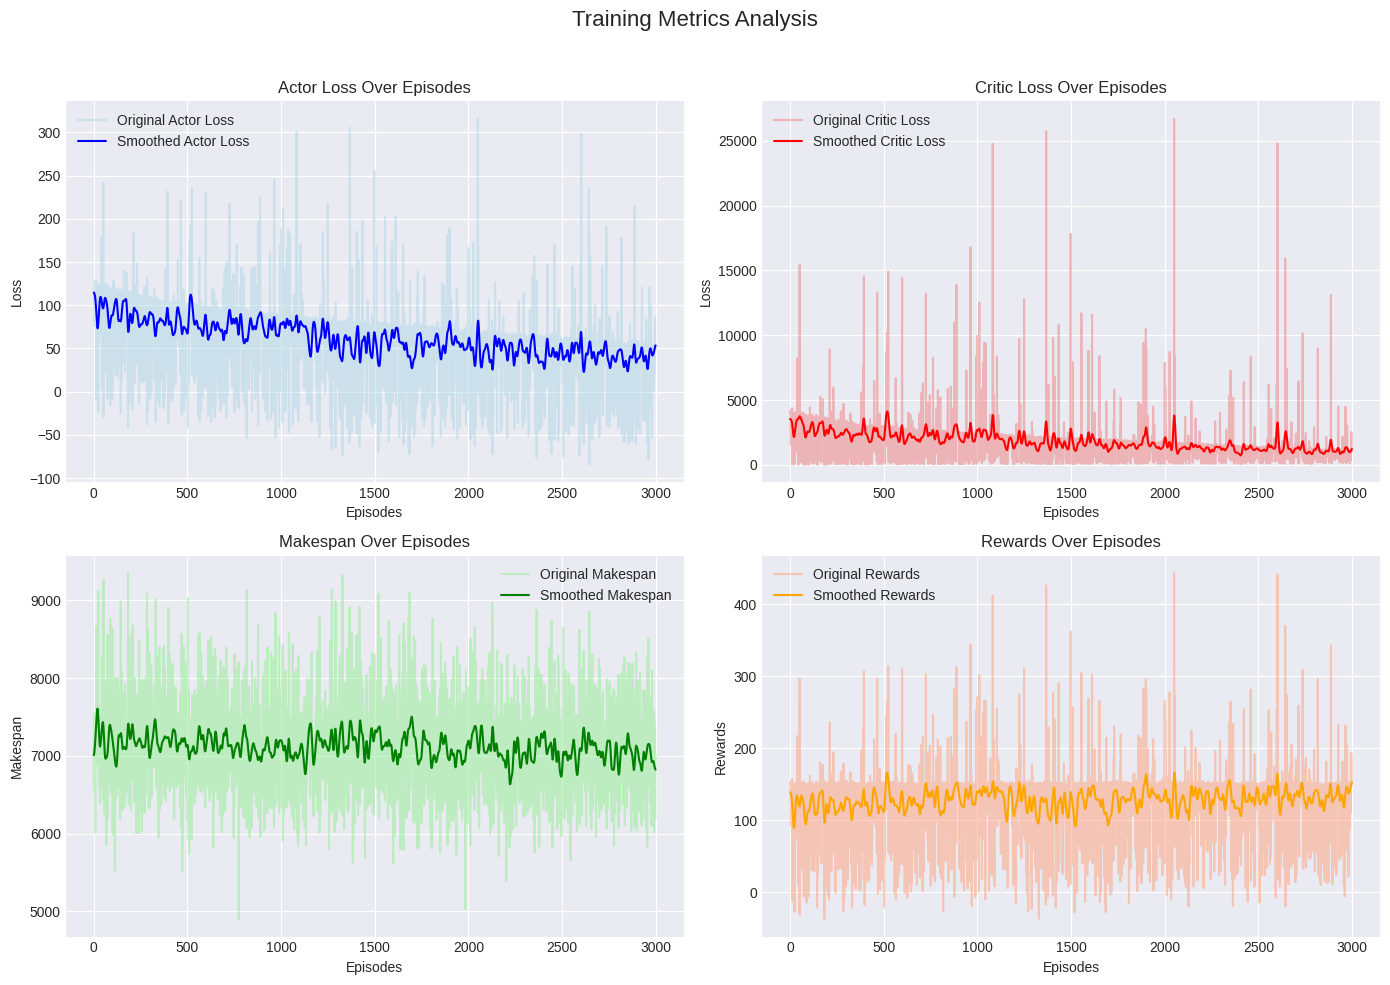

In [1]:
# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_03_30_11_24.txt"
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_03_30_11_24.txt"
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_03_30_11_24.txt"
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_03_30_11_24(95-26-128-1E-4训)16108.txt"
# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()

# Save the figure
fig.savefig("training_metrics_analysis.png", dpi=300)


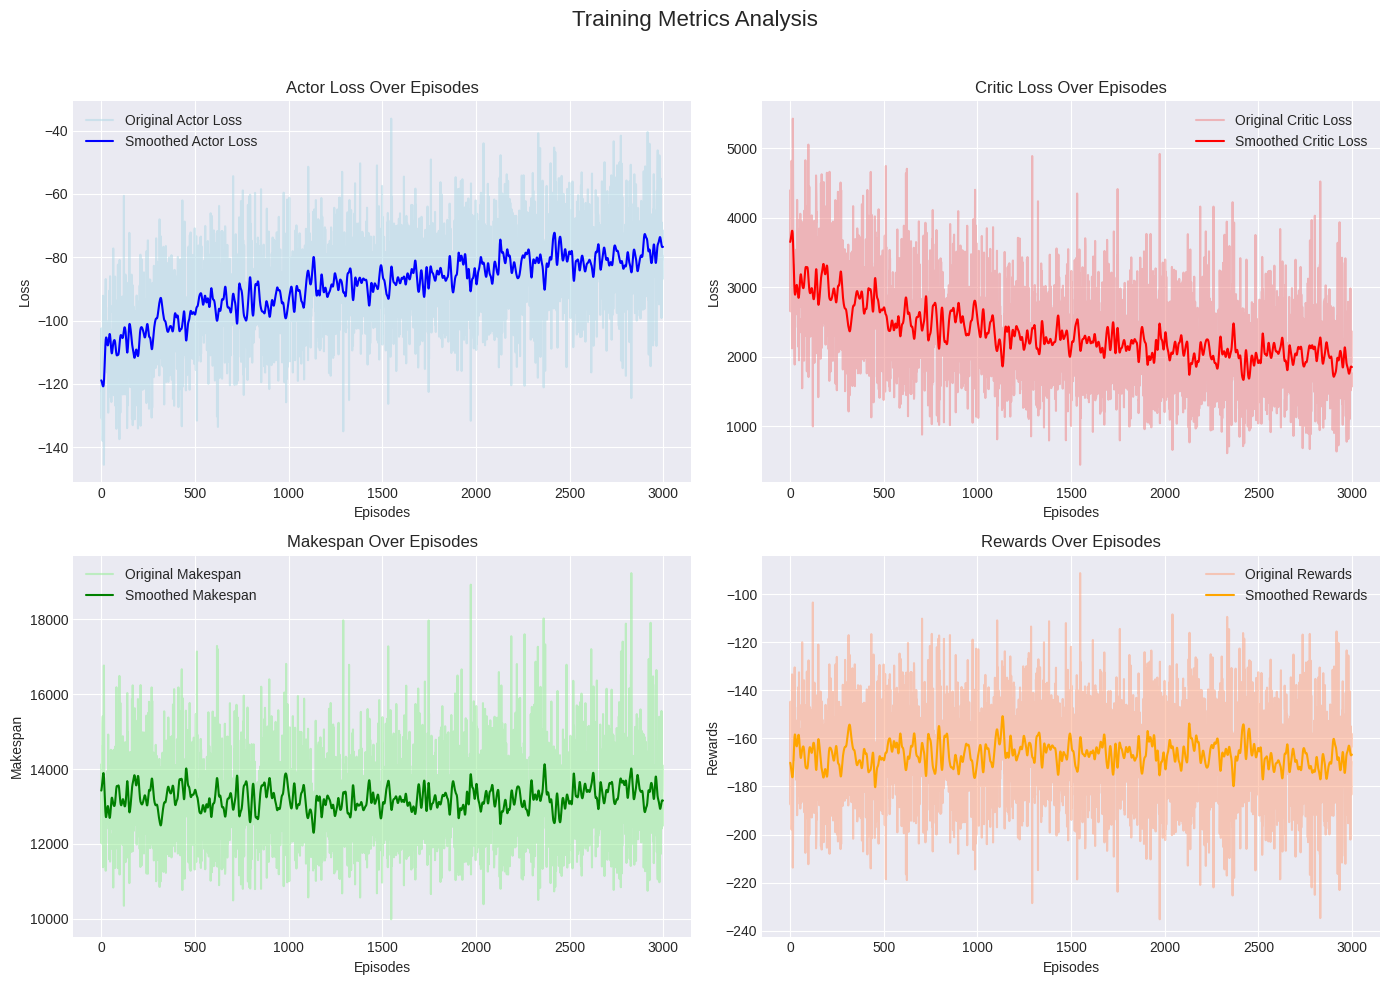

In [1]:
# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/actor_loss_03_31_18_52.txt"
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/critic_loss_03_31_18_52.txt"
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/makespan_03_31_18_52.txt"
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/rewards_03_31_18_52(150-gcn-128-1e-4训)29749.txt"

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()

# Save the figure
fig.savefig("training_metrics_analysis.png", dpi=300)
